In [1]:
import matplotlib.pyplot as plt
from openbb import obb
import pyfinlib


In [2]:
aapl = obb.equity.price.historical(symbol='AAPL', provider='yfinance')

In [3]:
aapl.results

[YFinanceEquityHistoricalData(date=2024-02-15, open=183.5500030517578, high=184.49000549316406, low=181.35000610351562, close=183.86000061035156, volume=65434500, vwap=None, split_ratio=None, dividend=0.0),
 YFinanceEquityHistoricalData(date=2024-02-16, open=183.4199981689453, high=184.85000610351562, low=181.6699981689453, close=182.30999755859375, volume=49701400, vwap=None, split_ratio=None, dividend=0.0),
 YFinanceEquityHistoricalData(date=2024-02-20, open=181.7899932861328, high=182.42999267578125, low=180.0, close=181.55999755859375, volume=53665600, vwap=None, split_ratio=None, dividend=0.0),
 YFinanceEquityHistoricalData(date=2024-02-21, open=181.94000244140625, high=182.88999938964844, low=180.66000366210938, close=182.32000732421875, volume=41529700, vwap=None, split_ratio=None, dividend=0.0),
 YFinanceEquityHistoricalData(date=2024-02-22, open=183.47999572753906, high=184.9600067138672, low=182.4600067138672, close=184.3699951171875, volume=52292200, vwap=None, split_ratio=N

In [4]:
data = [i.open for i in aapl.results]

In [5]:
returns = pyfinlib.util.rates_of_change(data)
portfolio = pyfinlib.Portfolio([pyfinlib.PortfolioAsset(1, "AAPL", data)])

VaR_historical = portfolio.value_at_risk(0.05)
VaR_historical_10 = portfolio.value_at_risk(0.1)
VaR_historical, VaR_historical_10

(-0.026022532720986438, -0.020002956044025813)

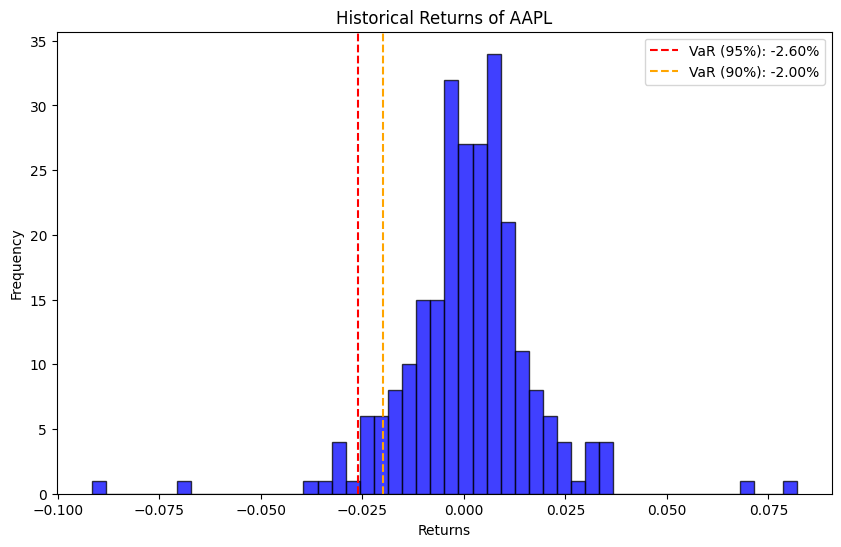

In [6]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='orange', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.title('Historical Returns of AAPL')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()